In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
rf = xr.DataArray(
    data=np.loadtxt("data_sahelprecip19012017.txt", skiprows=8,)[:, 1:]
    * 0.01,  # skip year(1.) column and scale to cm/month
    dims=("year", "month"),
    name="sahel rainfall anomaly index",
    coords={
        "year": pd.date_range("1901-1-1", "2017-1-1", freq="YS"),
        "month": np.arange(1, 13),
    },
    attrs={"unit": "cm/month"},
)

rfjas = rf.loc[:, 7:9].mean("month")

gst = xr.open_dataset("data_globaltempv5.nc").anom  # MLOST v5

gstamj = (
    gst.sel(
        time=(gst["time.month"] >= 4)
        & (gst["time.month"] <= 6)
        & (gst["time.year"] >= 1901)
        & (gst["time.year"] <= 2017)
    )
    .groupby("time.year")
    .mean()
    .drop("z")  # delete z coordinate
    .squeeze()
    .assign_coords(year=("year", rfjas["year"]))
)

# non-weighted means  perhaps weighted mean better ?

# rfjas = rfjas.assign_coords(year=("year", gstamj['year']))
# rfjas, gstamj = xr.broadcast(rfjas, gstamj)

In [3]:
rf

<xarray.DataArray 'sahel rainfall anomaly index' (year: 117, month: 12)>
array([[-0.05, -0.06, -0.05, ...,  1.31,  0.6 ,  0.1 ],
       [-0.04,  0.38,  0.83, ...,  1.11, -0.13,  0.27],
       [ 0.25, -0.06, -0.1 , ...,  0.69,  0.25,  0.04],
       ...,
       [-0.04,  0.12,  0.01, ...,  1.53,  0.16, -0.03],
       [ 0.07, -0.07,  0.23, ..., -0.83,  0.01, -0.03],
       [-0.04, -0.07, -0.02, ..., -1.3 , -0.05,  0.11]])
Coordinates:
  * year     (year) datetime64[ns] 1901-01-01 1902-01-01 ... 2017-01-01
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    unit:     cm/month

In [13]:
rf.to_netcdf("tes.nc")

In [208]:
cr

<xarray.DataArray (lat: 36, lon: 72)>
array([[        nan,         nan,         nan, ...,         nan,
                nan, -0.0363884 ],
       [        nan,         nan,         nan, ...,  0.34003536,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan, -0.13287779],
       ...,
       [-0.06266599, -0.08591999,  0.01531179, ...,         nan,
        -0.16508682, -0.03768141],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5

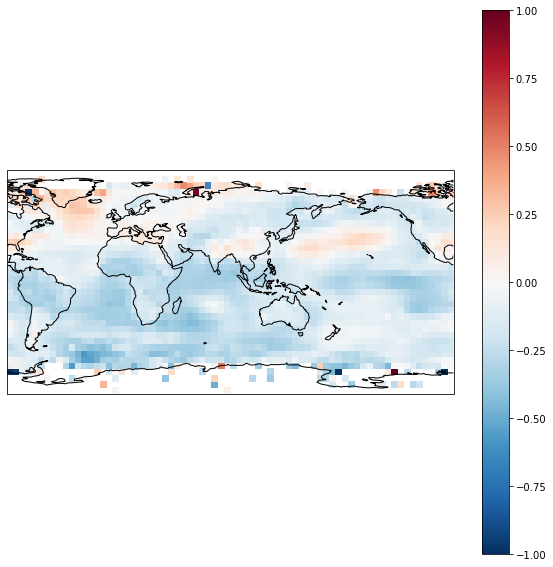

In [232]:
# This is the map projection we want to plot *onto*
map_proj = ccrs.PlateCarree(central_longitude=90)

fig = plt.figure(figsize=(10, 10))

p = cr.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    #              col='time', col_wrap=1,  # multiplot settings
    #              aspect=ds.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
    subplot_kws={"projection": map_proj},
)  # the plot's projection

p.axes.coastlines()
# # We have to set the map's options on all axes
# for ax in p.axes.flat:
#     ax.coastlines()
#     ax.set_extent([-160, -30, 5, 75])

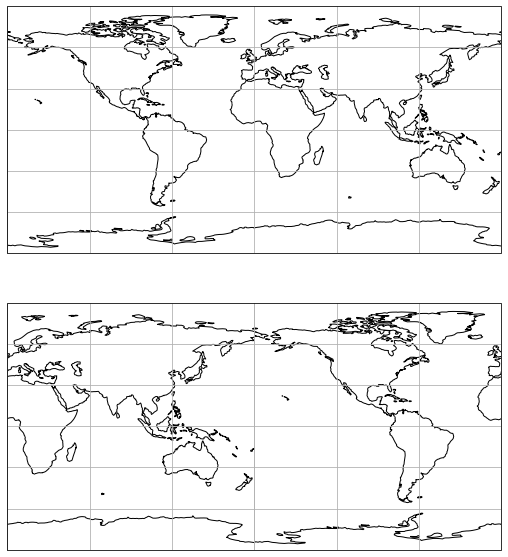

In [217]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

nplots = 2

fig = plt.figure(figsize=(10, 10))

for i in range(0, nplots):
    central_longitude = 0 if i == 0 else 180
    ax = fig.add_subplot(
        nplots,
        1,
        i + 1,
        projection=ccrs.PlateCarree(central_longitude=central_longitude),
    )
    ax.coastlines(resolution="110m")
    ax.gridlines()
    ax.plot()

In [218]:
# This is the map projection we want to plot *onto*
map_proj = ccrs.PlateCarree(central_longitude=0, central_latitude=45)

p = gstamj.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    col="time",
    col_wrap=1,  # multiplot settings
    #              aspect=gstamj.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
    subplot_kws={"projection": map_proj},
)  # the plot's projection

# We have to set the map's options on all axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])

TypeError: __init__() got an unexpected keyword argument 'central_latitude'

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(
    nplots, 1, i + 1, projection=ccrs.PlateCarree(central_longitude=central_longitude)
)

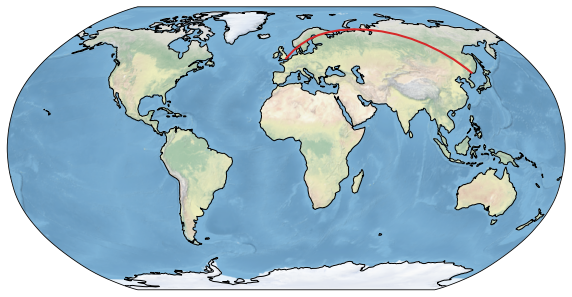

In [266]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()
ax.coastlines()

ax.plot([-0.08, 132], [51.53, 43.17], color="C3", lw=2, transform=ccrs.Geodetic())
# ax.pcolormesh(cr)